In [1]:
paths = [
    "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_labelnoise_human/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_TinyModel_laptypediag_subset_50000_range_0_10000_corrupt_0.0_corrupt_data_0.0_0_corrupted_idx_human_annotated.pkl",
    "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_labelnoise_human/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_TinyModel_laptypediag_subset_50000_range_10000_20000_corrupt_0.0_corrupt_data_0.0_0_corrupted_idx_human_annotated.pkl",
    "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_labelnoise_human/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_TinyModel_laptypediag_subset_50000_range_30000_40000_corrupt_0.0_corrupt_data_0.0_0_corrupted_idx_human_annotated.pkl",
    "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_labelnoise_human/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_TinyModel_laptypediag_subset_50000_range_40000_49999_corrupt_0.0_corrupt_data_0.0_0_corrupted_idx_human_annotated.pkl",
]

In [2]:
import pickle
kl_data_uncorrupted = []
kl_data_corrupted = []
for path in paths:
    with open(path, 'rb') as file:
        data = pickle.load(file)
        corrupted_idx = [idx for idx in data["idx"][0] if idx in data["corrupted_idx"]]
        uncorrupted_idx = [idx for idx in data["idx"][0] if idx not in data["corrupted_idx"]]

        indices_of_corrupted_idx = [data["idx"][0].index(value) for value in corrupted_idx]
        indices_of_uncorrupted_idx = [data["idx"][0].index(value) for value in uncorrupted_idx]

        corrupted_kl = [data["kl"][0][index] for index in indices_of_corrupted_idx]
        uncorrupted_kl = [data["kl"][0][index] for index in indices_of_uncorrupted_idx]

        kl_data_corrupted.extend(corrupted_kl)
        kl_data_uncorrupted.extend(uncorrupted_kl)
        print("")

Text(0.5, 1.0, 'CIFAR-10N')

<Figure size 640x480 with 0 Axes>

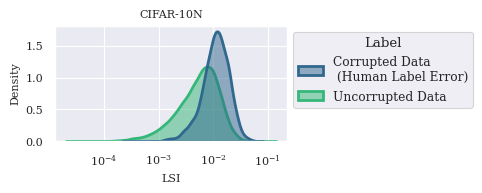

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context="paper", font_scale=2)
sns.set_context("paper", rc={"lines.linewidth": 2})
sns.despine()
plt.rcParams.update({
    'font.family': 'serif',
})

kl_data1 = [kl_data_corrupted, kl_data_uncorrupted]
label_list = ["Corrupted Data\n (Human Label Error)", "Uncorrupted Data"]


long_df1 = pd.DataFrame()

for i, data_array in enumerate(kl_data1):
    temp_df = pd.DataFrame({'LSI': data_array, 'Label': label_list[i]})
    long_df1 = pd.concat([long_df1, temp_df])

fig = plt.figure(figsize=(3,1.5))
# Set common plot parameters
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('axes', titlesize=8)

# Plot the first KDE plot
p1 = sns.kdeplot(data=long_df1, log_scale=True, fill=True, alpha=0.5, hue="Label", x="LSI", common_norm=False, linewidths=2, palette='viridis')
sns.move_legend(p1, "upper left", bbox_to_anchor=(1, 1))
plt.title("CIFAR-10N")